# Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]) # стаж

In [5]:
# средний балл ЕГЭ (целевая переменная)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [6]:
y_pred1 = 45 * X[0] + 5 * X[1] 
y_pred2 = 40 + 6 * X[1]

In [8]:
w = np.linalg.inv(X @ X.T) @ X @ y
w

array([47.23214286,  3.91071429])

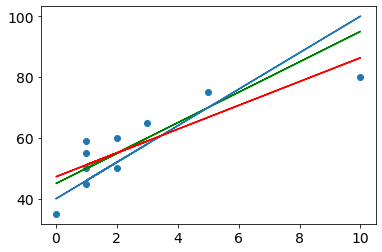

In [9]:
plt.scatter(X[1], y)
plt.plot(X[1], 45 + X[1] * 5, color='g')
plt.plot(X[1], 40 + X[1] * 6)
plt.plot(X[1], w[0] + w[1] * X[1], color='red');

### Домашние задание

1. Подберите скорость обучения (alpha) и количество итераций (до совпадения ответов с результатами МНК):

In [11]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [43]:
n = X.shape[1]
alpha = 0.0613
w = np.array([1, 0.5])

for i in range(400+1):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))
    if i % 10 == 0:
        print(i, w, err) 
        # МНК: array([47.23214286,  3.91071429]) 45.937499999999986

0 [ 7.75526 21.342  ] 3173.15
10 [26.21429085  9.76092736] 404.4856281700696
20 [36.24015429  6.32279402] 123.92168033574558
30 [41.52090783  5.03957039] 66.14703291920164
40 [44.27187538  4.4717635 ] 51.32559110874969
50 [45.69915628  4.19659047] 47.379903169763
60 [46.43854894  4.05780083] 46.323856927356985
70 [46.82136878  3.98667236] 46.04099657513949
80 [47.01953124  3.94999513] 45.965224786670646
90 [47.12209966  3.93103858] 45.944926961039265
100 [47.17518725  3.92123235] 45.93948954687766
110 [47.20266414  3.91615791] 45.93803296319766
120 [47.21688546  3.91353171] 45.937642771087475
130 [47.22424604  3.9121725 ] 45.93753824576165
140 [47.22805568  3.91146902] 45.93751024533965
150 [47.23002744  3.91110491] 45.937502744539024
160 [47.23104798  3.91091646] 45.93750073521178
170 [47.23157618  3.91081893] 45.937500196949784
180 [47.23184956  3.91076845] 45.93750005275924
190 [47.23199105  3.91074232] 45.93750001413324
200 [47.23206429  3.91072879] 45.93750000378604
210 [47.232102

$\alpha = 0.0613, n = 360$

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [70]:
w = np.array([1, 0.5])

for i in range(1000):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    '''for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))'''
    w -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
    if i % 100 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [28.59726 28.09726] 3173.15
100 [1.82002583e+20 1.82002583e+20] 2.8675448103053685e+41
200 [1.9746441e+39 1.9746441e+39] 3.3754584886301254e+79
300 [2.14239778e+58 2.14239778e+58] 3.973336342476152e+117
400 [2.3244028e+77 2.3244028e+77] 4.67711327027721e+155
500 [2.52186984e+96 2.52186984e+96] 5.505546638261816e+193
600 [2.73611248e+115 2.73611248e+115] 6.480716209868378e+231
700 [2.96855587e+134 2.96855587e+134] 7.628612625123578e+269
800 [3.22074622e+153 3.22074622e+153] inf
900 [3.49436112e+172 3.49436112e+172] inf


<ipython-input-11-421974dc77a9>:2: RuntimeWarning: overflow encountered in square
  err = np.mean((y - y_pred)**2)


Нужно убрать $np.sum$ и знак умножения между матрицей $X$ и $(y_{pred} - y)$ заменить на знак скалярного произведения $@$

In [72]:
w = np.array([1, 0.5])
alpha = 0.0613

for i in range(360+1):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    w -= (alpha * (1/n * 2 * (X @ (y_pred - y))))
    if i % 10 == 0:
        print(i, w, err) 
        # МНК: array([47.23214286,  3.91071429]) 45.937499999999986

0 [ 7.75526 21.342  ] 3173.15
10 [26.21429085  9.76092736] 404.4856281700698
20 [36.24015429  6.32279402] 123.92168033574565
30 [41.52090783  5.03957039] 66.14703291920159
40 [44.27187538  4.4717635 ] 51.32559110874968
50 [45.69915628  4.19659047] 47.379903169763
60 [46.43854894  4.05780083] 46.323856927356985
70 [46.82136878  3.98667236] 46.04099657513949
80 [47.01953124  3.94999513] 45.965224786670646
90 [47.12209966  3.93103858] 45.944926961039265
100 [47.17518725  3.92123235] 45.93948954687766
110 [47.20266414  3.91615791] 45.93803296319766
120 [47.21688546  3.91353171] 45.937642771087475
130 [47.22424604  3.9121725 ] 45.93753824576165
140 [47.22805568  3.91146902] 45.93751024533965
150 [47.23002744  3.91110491] 45.937502744539024
160 [47.23104798  3.91091646] 45.93750073521178
170 [47.23157618  3.91081893] 45.937500196949784
180 [47.23184956  3.91076845] 45.93750005275924
190 [47.23199105  3.91074232] 45.93750001413324
200 [47.23206429  3.91072879] 45.93750000378604
210 [47.232102

*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога. 

Сколько нужно сделать итераций, если установить допустимое отклонение mse в размере $\text{diff}=10^{-6}$, а значение $\alpha=10^{-2}$?

In [95]:
w = np.array([1, 0.5])
diff = 1e-6
alpha = 1e-2

err = 2 * calc_mse(y, np.dot(w, X))
i = 0


while err - calc_mse(y, np.dot(w, X)) > diff:
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    w -= (alpha * (1/n * 2 * (X @ (y_pred - y))))
    
    if i % 10 == 0:
        print(i, w, err)
    
    i+=1
    
print(i, w, err)

0 [2.102 3.9  ] 3173.15
10 [ 7.88197949 10.94665576] 895.7992568721307
20 [11.82321845 10.44288316] 734.1943046789495
30 [15.33838126  9.79996576] 604.3598272772634
40 [18.50371626  9.21563317] 499.01844357436784
50 [21.35487986  8.68914872] 413.5487715072507
60 [23.92307798  8.21491142] 344.20218946868323
70 [26.23639435  7.78773986] 287.9372205719397
80 [28.32012482  7.40296309] 242.28613537222662
90 [30.19705472  7.05637362] 205.24671953719772
100 [31.88770806  6.74418155] 175.19445858001842
110 [33.4105719   6.46297309] 150.81128815797626
120 [34.78229859  6.20967327] 131.0277849906938
130 [36.01788778  5.98151227] 114.97626294514153
140 [37.13085048  5.7759952 ] 101.95271712515977
150 [38.13335681  5.59087473] 91.38594686849362
160 [39.03636904  5.42412662] 82.8125034145725
170 [39.8497615   5.27392748] 75.85636347094018
180 [40.58242855  5.1386349 ] 70.21243717977558
190 [41.24238179  5.01676949] 65.63318715918639
200 [41.83683774  4.90699865] 61.9177717428135
210 [42.3722967   4

Заметки по матричным вычислениям http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf